In [1]:
subscription_key = '65733df168e2404583e373ba1df91165'
assert subscription_key

vision_base_url = 'https://uksouth.api.cognitive.microsoft.com/'
detect_url = vision_base_url + 'face/v1.0/detect'
analyze_url = vision_base_url + 'vision/v2.0/analyze'

In [2]:
import requests
params_detect = {
    'returnFaceId': 'true', 
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }
params_analyze = {
    'visualFeatures': 'Categories,Description,Color'
    }

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

In [5]:
def local_image(image_locn, type):
    if type == "local":
        image_data = open(image_locn, "rb").read()
        headers = {'Ocp-Apim-Subscription-key': subscription_key, 
                   'Content-Type': 'application/octet-stream'}
        response = requests.post(detect_url, headers=headers, params=params_detect, data=image_data)
    else:
        headers = {'Ocp-Apim-Subscription-key': subscription_key }
        response = requests.post(detect_url, headers=headers, params=params_detect, json={"url": image_locn})

    faces = response.json()
    
#    print(faces)
    
    if type == "local":
        image_file = image_locn
    else:
        image_file = BytesIO(requests.get(image_locn).content)    

    image = Image.open(image_file)
    
    plt.figure(figsize=(8,8))
    ax=plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va = "bottom")

In [6]:
local_image("Images/TestImage001.jpg", "local")

[{'faceId': 'fdf1ded3-3c5d-4277-9dc6-788928ac2779', 'faceRectangle': {'top': 315, 'left': 114, 'width': 221, 'height': 221}, 'faceAttributes': {'smile': 1.0, 'headPose': {'pitch': 0.0, 'roll': 24.5, 'yaw': 10.2}, 'gender': 'male', 'age': 22.0, 'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'medium', 'value': 0.39}, 'exposure': {'exposureLevel': 'overExposure', 'value': 0.82}, 'noise': {'noiseLevel': 'low', 'value': 0.1}, 'makeup': {'eyeMakeup': True, 'lipMakeup': False}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.04, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 0.98}, {'color': 'brown', 'confidence': 0.95}, {'color': 'gray', 'confidence': 0.33}, {'color': 'blond', 'confidence': 0.2

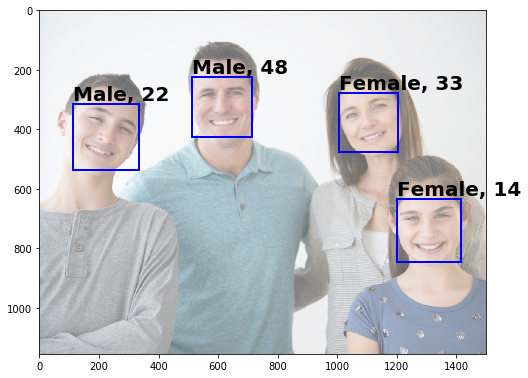

In [7]:
local_image("https://how-old.net/Images/faces2/main001.jpg", "web")